# Продажи видеоигр

In [1]:
import pandas as pd 
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#чтение файла
data = pd.read_csv('/datasets/games.csv')
data.info()
print('Количество строк:',len(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Количество строк: 16715


Открыт и изучен файл с данными об играх,их продаж и рейтинге.
В файле с данными 11 столбцов: 5 из которых объектные, 6 числовых. Всего строк: 16715

## Предобработка данных

In [3]:
#приведение названий столбцов к нижнему регитру
data = data.rename(str.lower, axis='columns')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
#значение 'tbd'
data['user_score'] = data['user_score'].where(data['user_score'] != 'tbd', 0)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

TBD(To Be Determined) служит для отметки неясностей или пропусков.
Данные строки были заполнены, как пропуски.

In [5]:
#изменение типа данных
data.info()
data['year_of_release'] = pd.to_numeric(data['year_of_release'],errors = 'ignore',downcast='integer')
data['user_score'] = data['user_score'].astype('float')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 n

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
#проверка на дубликаты 
data.duplicated().sum()

0

Среди данных дубликаты отсутствуют

In [7]:
#проверка на пропуски 
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
#поиск причины пропусков в годах выпуска
release_null = data[data['year_of_release'].isnull()]
release_null['na_sales'].mean()
release_null['na_sales'].median()

0.09

Возможная причина пропусков в годах выпуска игры - отсутствие ее официального выпуска, медиана продаж и среднее слишком малы, отсюда можно сделать два возможных варианта:
1) выпуск не состояля в силу отсутствия спроса на данный продукт
2) выпуск запланирован на 2017 год

In [9]:
#поиск причины пропусков в рейтинге от организации ESRB
rating_null = data[data['rating'].isnull()]
rating_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
#суммарные продажи во всех регионах
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [11]:
#поиск причины пропусков в оценке пользователей 
data[data['user_score'].isnull()]
for i in data['all_sales'].unique():
    median = data.loc[data['all_sales'] == i,'user_score'].median()
    data.loc[data['all_sales'] == i,'user_score'] = data.loc[data['all_sales'] == i,'user_score'].fillna(median)

data.isnull().sum()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score          156
rating             6766
all_sales             0
dtype: int64

Возможная причина пропуков в оценке критиков,оценке пользователей и в рейтинге от организации ESRB - 
в 1970 году еще не давались подобные оценки и рейтинги, огранизаация ESRB была основана в 1994г.
а где значения пропущены офицального выпуска игры еще не было, откуда следует, что оценки и рейтинг произведели еще быть не могли

In [12]:
#пропуски в названии и жанре
data[data['genre'].isnull()]
data[data['name'].isnull()]
data = data.dropna(subset = ['genre'])
data = data.dropna(subset = ['name'])
data.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score          156
rating             6764
all_sales             0
dtype: int64

Строки, где есть пропуски в названиях игр, содержать достаточно малое количество информации, так как в них так же нет данных о рейтинге, оценке пользователей и критиков, типе жанра.
Принято решение удалить данные строки

Строки, в которых остались пропуски не были удалены или заменены на иные значения, 
так как присутствует их значимость в данной работе, 
замена на иное значение сильно исказит дальннейший анализ

## Исследовательский анализ 

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
Name: year_of_release, dtype: int64

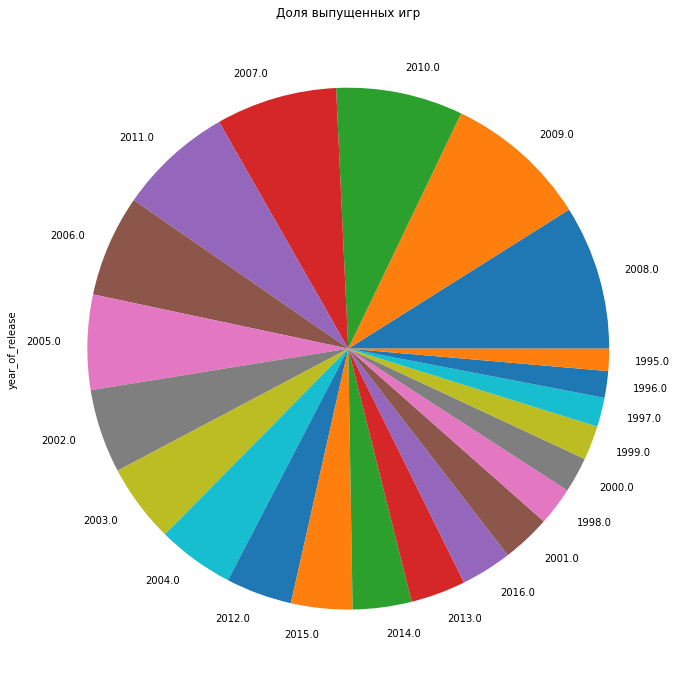

In [13]:
#доля выпущенных игр за все года
data = data.query('year_of_release > 1994.0')
data['year_of_release'].value_counts().plot(
    x = 'year_of_release',
    title = 'Доля выпущенных игр',
    kind = 'pie',
    figsize = (12,12))
year_count = data['year_of_release'].value_counts()
year_count

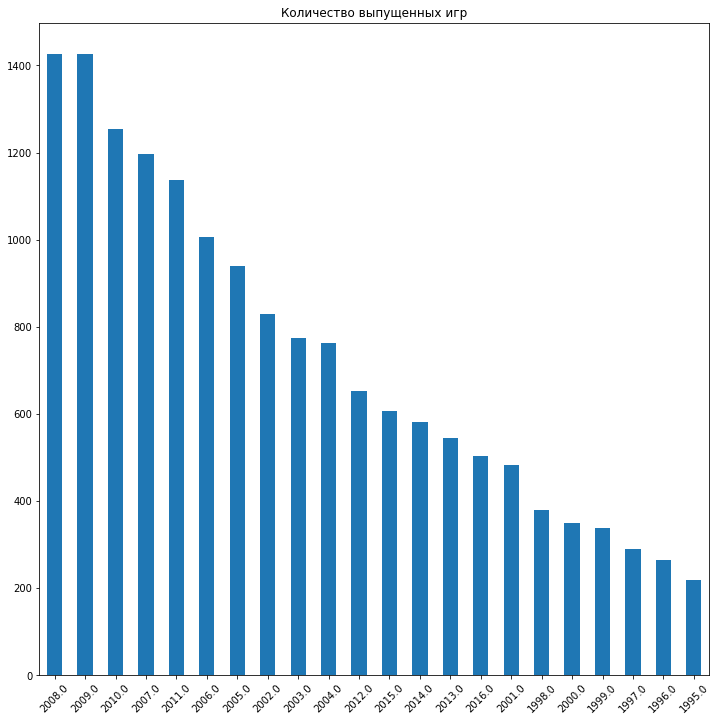

In [14]:
data['year_of_release'].value_counts().plot(
    x = 'year_of_release',
    title = 'Количество выпущенных игр',
    kind = 'bar',
    figsize = (12,12),
    rot = 45
)

Подсчитано количество игр выпущенных в опреленный год, так как до 1995 года продажи были незначительно, 
было принято решение исключить их из анализа выпущенных игр по годам.
В среднем количество выпущенных игр растет с каждым годом,
пиковая точка выпуска наблюдается в 2008 и 2009 годах, 
далее с увеличением лет количество выпущенных игр сокращается.

In [15]:
#наилучшие платформы
platform = data.groupby('platform')['all_sales'].sum().sort_values(ascending = False)
print(platform.head())

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
Name: all_sales, dtype: float64


In [16]:
#продажи по платформам
platform = sns.load_dataset('flights')
lst = ['PS2','X360 ','PS3','Wii','DS']
platform = data[data['platform'].isin(lst)]
platform = platform.pivot_table(index = ['year_of_release','platform'],values = 'all_sales', aggfunc = ['sum'])
platform 

sum
                         all_sales
year_of_release platform          
2000.0          PS2          39.17
2001.0          PS2         166.43
2002.0          PS2         205.38
2003.0          PS2         184.31
2004.0          DS           17.27
                PS2         211.81
2005.0          DS          130.14
                PS2         160.66
2006.0          DS          119.81
                PS2         103.42
                PS3          20.96
                Wii         137.15
2007.0          DS          146.94
                PS2          75.99
                PS3          73.19
                Wii         152.77
2008.0          DS          145.31
                PS2          53.90
                PS3         118.52
                Wii         171.32
2009.0          DS          119.54
                PS2          26.40
                PS3         130.93
                Wii         206.97
2010.0          DS           85.02
                PS2           5.64
                PS3         142.17
                Wii         127.95
2011.0          DS           26.18
                PS2           0.45
                PS3         156.78
                Wii          59.65
2012.0          DS           11.01
                PS3         107.36
                Wii          21.71
2013.0          DS            1.54
                PS3         113.25
                Wii           8.59
2014.0          PS3          47.76
                Wii           3.75
2015.0          PS3          16.82
                Wii           1.14
2016.0          PS3           3.60
                Wii           0.18

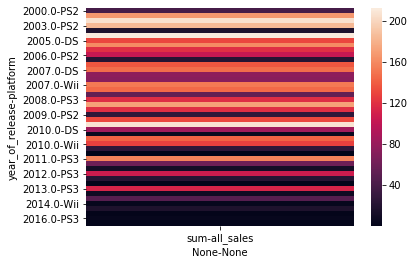

In [17]:
sns.heatmap(platform)

Выбраны ТОП-5 платформ, на которых самые высокие суммарные продажи.
Из сводной таблица видно, что из данных платформ перая лидирует PS2,оставаясь единственной до 2004 года, далее
с 2004 года появляется вторая платформа, но еще занимая маленькую долю продаж(8 % от продаж с платформы PS2), 
а уже в 2005 году платформа DS охватывает чуть меньшую долю рынка, чем PS2((81 % от продаж с платформы PS2)).
В 2006 году продажи с платформы DS превышают продажи с PS2,и в этот год на рынок выходят еще 2 платформы, одна из которых занимает лидируещее место по продажам - Wii(137.15 миллионов долларов) и так продолжается до 2010 года.
В 2013 году платфома PS2 исчезает из рынка,
а к 2016 году на рынке остается только две из анализируемых платформ PS3 и Wii, продажи с этих платформ столь малы, что можно сделать предположение, что на рынке появились новые платформы - лидеры, забрав большую долю рынка.

## Актуальный период

In [18]:
data15 = data[data['year_of_release'].isin(['2015.0'])]
data15

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,XOne,2015.0,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16608,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015.0,Misc,0.00,0.00,0.01,0.00,NaN,5.2,NaN,0.01
16610,Kiniro no Corda 3,3DS,2015.0,Adventure,0.00,0.00,0.01,0.00,NaN,5.2,NaN,0.01
16618,Xblaze: Lost Memories,PSV,2015.0,Adventure,0.01,0.00,0.00,0.00,NaN,7.0,M,0.01


In [19]:
data15['all_sales'].sum()

267.98

In [20]:
#лучшие платформы по продажам
data15_pivot0 = sns.load_dataset('flights')
data15_pivot0 = data15.pivot_table(index = 'platform',values = 'all_sales', aggfunc = 'sum')
data15_pivot0

,all_sales
platform,
3DS,27.78
PC,8.52
PS3,16.82
PS4,118.90
PSP,0.12
PSV,6.25
Wii,1.14
WiiU,16.35
X360,11.96


AxesSubplot(0.125,0.125;0.62x0.755)


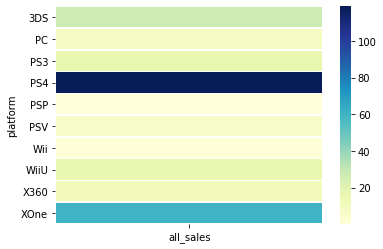

In [21]:
print(sns.heatmap(data15_pivot0,linewidths=.5,cmap="YlGnBu"))

Изучены лидирующие платформы за актуальный период.
Наиболее прибыльные платформы - PS4 и XOne.
Платформы, которые имеют большее количество продаж за весь период в актуальный год показали более низкие прожажи нежели такие платформы, как PS4 и XOne.

AxesSubplot(0.125,0.125;0.775x0.755)


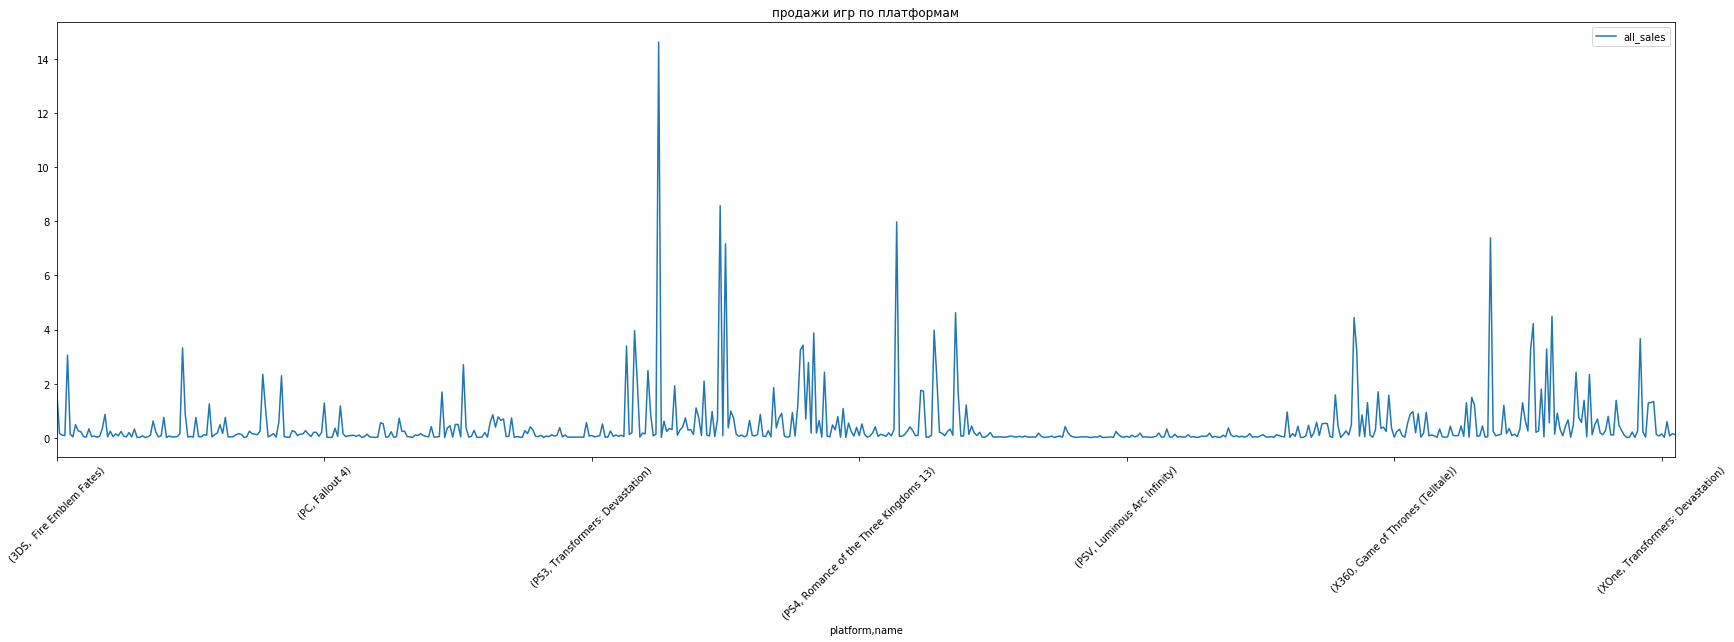

In [22]:
#глобальные продажи игр по платформам
data15_pivot = data15.pivot_table(index = ['platform','name'],values = 'all_sales', aggfunc = 'sum')
print(data15_pivot.plot(
    figsize = (29,8),
    title = 'продажи игр по платформам',
    rot = 45
))

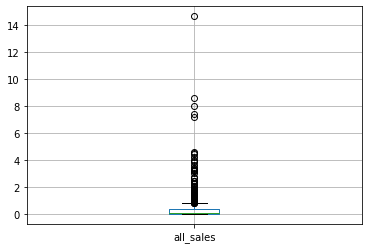

In [23]:
#ящик с усами для глобальных продаж
data15_pivot.boxplot()
plt.show()

In [24]:
#средние прожажи игр по платформам
data15_pivot_mean = data15.pivot_table(index = ['platform','name'],values = 'all_sales')

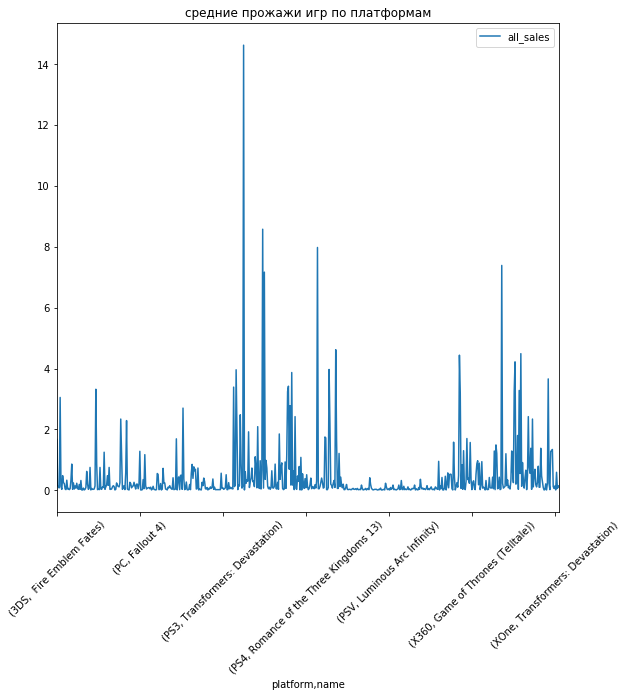

In [25]:
data15_pivot_mean.plot(
    title = 'средние прожажи игр по платформам',
    rot = 45,
    figsize = (9,9)
)

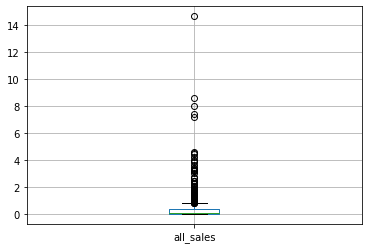

,all_sales
count,606.000000
mean,0.442211
std,1.099421
min,0.010000
25%,0.030000
50%,0.090000
75%,0.357500
max,14.630000


In [26]:
#ящик с усами для продаж в среднем
data15_pivot_mean.boxplot()
plt.show()
data15_pivot_mean.describe()

Исходя их данных по глобальным и средним продажам актуального периода, 
можно сделать вывод, что присутсвуют большое количество выбросов в обоих диаграммах размаха
суммарное количество продаж очень сильно отличается от платформы к платформе

In [27]:
#продажи внутри одной платформы
data15_PS4 = data15[data15['platform'].isin(['PS4'])]
data15_PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
231,Uncharted: The Nathan Drake Collection,PS4,2015.0,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
...,...,...,...,...,...,...,...,...,...,...,...,...
15085,Rugby League Live 3,PS4,2015.0,Action,0.00,0.02,0.00,0.00,NaN,7.6,E,0.02
15556,Natsuiro High School: Seishun Hakusho,PS4,2015.0,Action,0.00,0.00,0.02,0.00,NaN,5.4,NaN,0.02
15943,Professional Farmer 2016,PS4,2015.0,Action,0.00,0.01,0.00,0.00,NaN,5.2,NaN,0.01
16158,Raven's Cry,PS4,2015.0,Role-Playing,0.00,0.01,0.00,0.00,NaN,5.2,NaN,0.01


In [28]:
data15_PS4_dict = data15_PS4[['all_sales','critic_score','user_score']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9deddf6b90>,
      dtype=object)

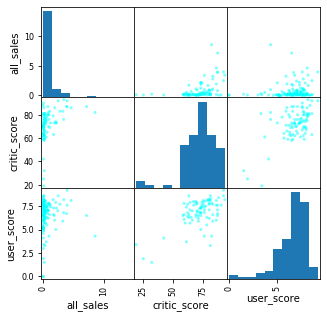

In [29]:
#диаграмма рассеяния
pd.plotting.scatter_matrix(
    data15_PS4_dict,
    figsize = (5,5),
    c='cyan'
)

In [30]:
#диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами
data15_PS4_dict.corr(method = 'spearman')

,all_sales,critic_score,user_score
all_sales,1.000000,0.506455,0.244397
critic_score,0.506455,1.000000,0.382491
user_score,0.244397,0.382491,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9df2339450>],
      dtype=object)

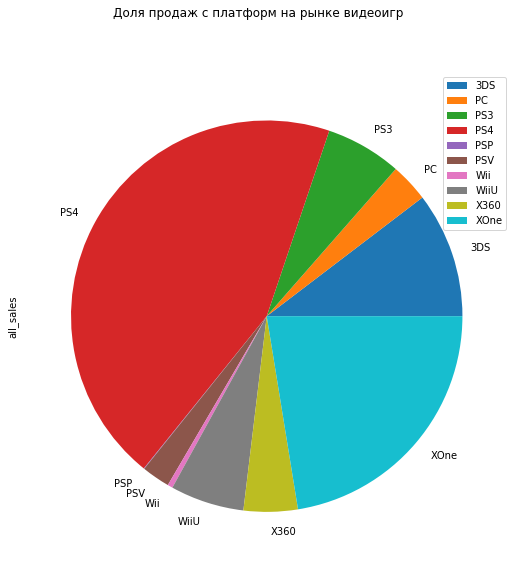

In [31]:
#соотношение с продажами игр на других платформах
data15_pivot0
data15_pivot0.plot(
    title = 'Доля продаж с платформ на рынке видеоигр',
    kind = 'pie',
    subplots=True,
    figsize = (9,9)
)

Прямая зависимость отзывов критиков к продажам существует,однако довольно слабая, 
а вот оценка пользователей практически не влияет на продажи, но так же существует малая обратная связь.
Продажи на других платформах существенно уступают лидирующщей платформе, которая заняла более 40 % на рынке видеоигр срели лидирующих платформ.

              all_sales  count_games  mean_sales
genre                                           
Shooter           67.51           34    1.985588
Sports            40.84           59    0.692203
Role-Playing      37.64           78    0.482564
Platform           6.05           13    0.465385
Racing             8.07           18    0.448333
Simulation         5.66           15    0.377333
Fighting           7.90           21    0.376190
Misc              11.57           39    0.296667
Action            72.02          253    0.284664
Adventure          8.16           54    0.151111
Puzzle             0.71            6    0.118333
Strategy           1.85           16    0.115625


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9defa1ce90>],
      dtype=object)

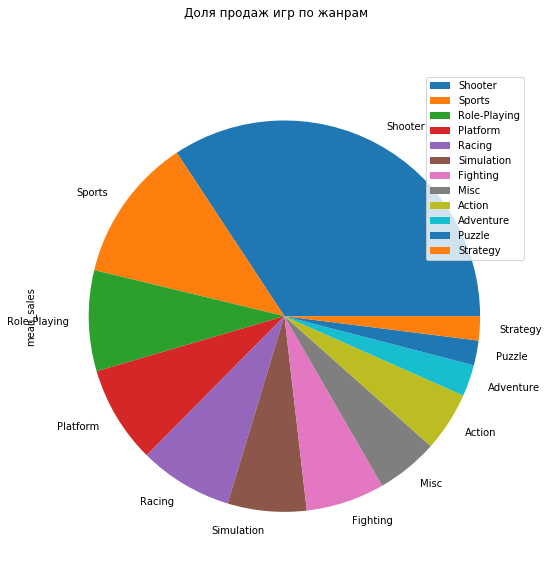

In [32]:
#распределение игр по жанрам
data15_pivot = data15.pivot_table(index = 'genre',values = 'all_sales',aggfunc = ['sum','count','mean'])
data15_pivot.columns = ['all_sales','count_games','mean_sales']
data15_pivot = data15_pivot.sort_values(by = 'mean_sales', ascending = False)
print(data15_pivot)
data15_pivot.plot.pie(
    subplots=True, 
    title = 'Доля продаж игр по жанрам',
    y = 'mean_sales',
    figsize = (9,9)
)

Продажи игр разных в зависимости от жанров сильно варьируются,
несмотре на то, что игры с жанром Action лидируют в общих продажах(72 млн доллара), 
они не занимают первую позицию по средним продажам, 
так как большое количество выпущенных игр в этом жанре искажает средние продажи на одну игру(0.28 млн долларов).
Среди средних продаж лидируют игры в жанре Shooter, где продажи на одну игру составляют 1.99 млн долларов.
По средним продажам на игру можно выделить три топовых жанра:
Shooter - 1.99 млн долларов,
Sports - 0.69 млн долларов,
Role-Playing - 0.48 млн долларов.

## Портрет пользователя по регионам

          na_all_sales  count_games  mean_sales
platform                                       
PS4              42.37          137    0.309270
XOne             36.03           80    0.450375
X360              7.36           35    0.210286
WiiU              6.76           28    0.241429
3DS               6.17           86    0.071744


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9def861c50>],
      dtype=object)

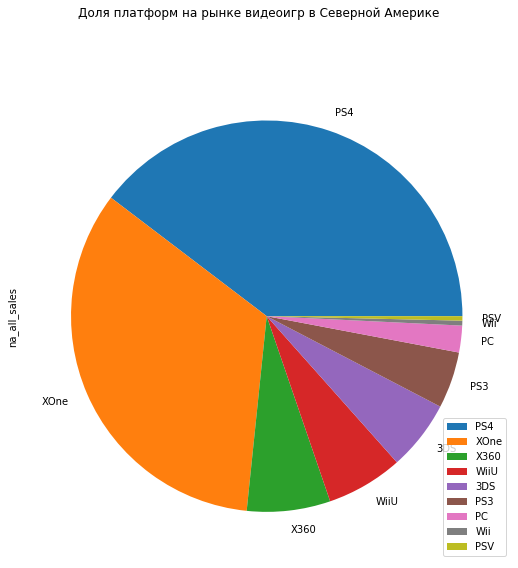

In [34]:
#Северная Америка
na = data15.pivot_table(index = 'platform',values = 'na_sales',aggfunc = ['sum','count','mean'])
na.columns = ['na_all_sales','count_games','mean_sales']
na = na.sort_values(by = 'na_all_sales', ascending = False)
print(na.head())
na.plot.pie(
    title = 'Доля платформ на рынке видеоигр в Северной Америке',
    subplots=True, 
    y = 'na_all_sales',
    figsize = (9,9)
)

ТОП-5 платформ по общим продажам в Северной Америке:
            
    PS4     -   42.37 млн долларов          
    XOne     -  36.03 млн долларов             
    X360    -   7.36  млн долларов        
    WiiU     -  6.76  млн долларов          
    3DS      -  6.17 млн долларов.
В данном случае был подсчитаны общие продажи на платформе, 
так как количество игр выпущенных с платформы тоже указывает на ее популярность среди создателей игр.

In [ ]:
#Европа
eu = data15.pivot_table(index = 'platform',values = 'eu_sales',aggfunc = ['sum','count','mean'])
eu.columns = ['eu_all_sales','count_games','mean_sales']
eu = eu.sort_values(by = 'eu_all_sales', ascending = False)
print(eu.head())
eu.plot.pie(
    title = 'Доля платформ на рынке видеоигр в Европе',
    subplots=True, 
    y = 'mean_sales',
    figsize = (9,9)
)

In [ ]:
ТОП-5 платформ по общим продажам в Северной Америке:
            
    PS4     -  51.76 млн долларов          
    XOne    -  18.47 млн долларов             
    PS3     -  6.04  млн долларов        
    PC      -  5.57  млн долларов          
    3DS     -  5.06 млн долларов.

In [ ]:
#Япония
jp = data15.pivot_table(index = 'platform',values = 'jp_sales',aggfunc = ['sum','count','mean'])
jp.columns = ['jp_all_sales','count_games','mean_sales']
jp = jp.sort_values(by = 'jp_all_sales', ascending = False)
print(jp.head())
jp.plot.pie(
    title = 'Доля платформ на рынке видеоигр в Японии',
    subplots=True, 
    y = 'jp_all_sales',
    figsize = (9,9)
)

ТОП-5 позиций в изученных регионах занимают практически одни и те же платформы.
Лидирующей платформой, занимая первое и второе место остается PS4.

# Проверка гипотез

### Гипотеза № 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [ ]:
#создание массивов для проверки гипотезы № 1
XOne = data15[data15['platform'].isin(['XOne'])]['user_score'].dropna()
PC = data15[data15['platform'].isin(['PC'])]['user_score'].dropna()

In [ ]:
#проверка гипотезы № 1 
results = st.ttest_ind(XOne,PC,equal_var = True)
alpha = .05
print('Статистическая значимость:',results.pvalue)
if (results.pvalue < alpha):
    print('Гипотезу № 1 отвергаем')
else:
    print('Гипотезу № 1 не отвергаем')
print(results)

### Гипотеза № 2: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

In [37]:
#создание массивов для проверки гипотезы № 2
sports = data15[data15['genre'].isin(['Sports'])]['user_score'].dropna()
action = data15[data15['genre'].isin(['Action'])]['user_score'].dropna()

In [38]:
#проверка гипотезы № 2
results = st.ttest_ind(sports,action,equal_var = True)
alpha = .05
print('Статистическая значимость:',results.pvalue)
if (results.pvalue < alpha):
    print('Гипотезу № 1 не отвергаем')
else:
    print('Гипотезу № 1 отвергаем')

Статистическая значимость: 0.0006944728277372705
Гипотезу № 1 не отвергаем


Проверка проводилась над двемя гипотезами,признанные, как нулевые:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Альтернативные гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC разные;
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») оинаковы.

Для проверки гипотез используем уровень статестической значимости, в данном случае = 5 %. 
Если же статестическая значимость будет меньше 5 %, 
то вероятность такого события при верной нулевой гипотезе слишком мала, откуда нулевая гипотеза отвегается.

Проверка гипотез показала, что:
Гипотезу № 1 не отвергаем - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
                   так как стат.значимость больше минимального уровня значимости и составляет 0.7215565869480235.
                   
                   
Гипотезу № 2 не  отвергаем - Средние пользовательские рейтинги жанров Action и Sports разные,
                   так как стат.значимость меньше минимального уровня значимости, и составляет 0.0006944728277372705

# Общий вывод

Открыт и изучен файл с данными об играх,их продаж и рейтинге. 
В файле с данными 11 столбцов: 5 из которых объектные, 6 числовых. 
    Всего строк: 16715
        
в TBD(To Be Determined) служит для отметки неясностей или пропусков. Данные строки были заполнены, как пропуски

Среди данных дубликаты отсутствуют

Возможная причина пропусков в годах выпуска игры - отсутствие ее официального выпуска,
медиана продаж и среднее слишком малы, отсюда можно сделать два возможных варианта: 
    1) выпуск не состояля в силу отсутствия спроса на данный продукт 
    2) выпуск запланирован на 2017 год

Возможная причина пропуков в оценке критиков,оценке пользователей и в рейтинге от организации ESRB - в 1970 году еще не давались подобные оценки и рейтинги, огранизаация ESRB была основана в 1994г. а где значения пропущены офицального выпуска игры еще не было, откуда следует, что оценки и рейтинг произведели еще быть не могли


Строки, где есть пропуски в названиях игр, содержать достаточно малое количество информации, так как в них так же нет данных о рейтинге, оценке пользователей и критиков, типе жанра. Принято решение удалить данные строки

Строки, в которых остались пропуски не были удалены или заменены на иные значения, так как присутствует их значимость в данной работе, замена на иное значение сильно исказит дальннейший анализ

Исследовательский анализ данных

Подсчитано количество игр выпущенных в опреленный год, так как до 1995 года продажи были незначительно, было принято решение исключить их из анализа выпущенных игр по годам. В среднем количество выпущенных игр растет с каждым годом, пиковая точка выпуска наблюдается в 2008 и 2009 годах, далее с увеличением лет количество выпущенных игр сокращается.


Выбраны ТОП-5 платформ, на которых самые высокие суммарные продажи. Из сводной таблица видно, что из данных платформ перая лидирует PS2,оставаясь единственной до 2004 года, далее с 2004 года появляется вторая платформа, но еще занимая маленькую долю продаж(8 % от продаж с платформы PS2), а уже в 2005 году платформа DS охватывает чуть меньшую долю рынка, чем PS2((81 % от продаж с платформы PS2)). В 2006 году продажи с платформы DS превышают продажи с PS2,и в этот год на рынок выходят еще 2 платформы, одна из которых занимает лидируещее место по продажам - Wii(137.15 миллионов долларов) и так продолжается до 2010 года. В 2013 году платфома PS2 исчезает из рынка, а к 2016 году на рынке остается только две из анализируемых платформ PS3 и Wii, продажи с этих платформ столь малы, что можно сделать предположение, что на рынке появились новые платформы - лидеры, забрав большую долю рынка.

Изучены лидирующие платформы за актуальный период. Наиболее прибыльные платформы - PS4 и XOne. Платформы, которые имеют большее количество продаж за весь период в актуальный год показали более низкие прожажи нежели такие платформы, как PS4 и XOne.

Исходя их данных по глобальным и средним продажам актуального периода, можно сделать вывод, что присутсвуют большое количество выбросов в обоих диаграммах размаха суммарное количество продаж очень сильно отличается от платформы к платформе

Прямая зависимость отзывов критиков к продажам существует,однако довольно слабая, а вот оценка пользователей практически не влияет на продажи, но так же существует малая обратная связь. Продажи на других платформах существенно уступают лидирующщей платформе, которая заняла более 40 % на рынке видеоигр срели лидирующих платформ.


Продажи игр разных в зависимости от жанров сильно варьируются, несмотре на то, что игры с жанром Action лидируют в общих продажах(72 млн доллара), они не занимают первую позицию по средним продажам, так как большое количество выпущенных игр в этом жанре искажает средние продажи на одну игру(0.28 млн долларов). Среди средних продаж лидируют игры в жанре Shooter, где продажи на одну игру составляют 1.99 млн долларов. По средним продажам на игру можно выделить три топовых жанра: Shooter - 1.99 млн долларов, Sports - 0.69 млн долларов, Role-Playing - 0.48 млн долларов.


Портрет пользлвателя 
В данном случае был подсчитаны общие продажи на платформе, 
так как количество игр выпущенных с платформы тоже указывает на ее популярность среди создателей игр.

ТОП-5 позиций в изученных регионах занимают практически одни и те же платформы.
Лидирующей платформой, занимая первое и второе место остается PS4.

Проверка гипотез показала, что:
Гипотезу № 1 не отвергаем - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
                   так как стат.значимость больше минимального уровня значимости и составляет 0.7215565869480235.
                   
                   
Гипотезу № 2 не  отвергаем - Средние пользовательские рейтинги жанров Action и Sports разные,
                   так как стат.значимость меньше минимального уровня значимости, и составляет 0.0006944728277372705


        